In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import re
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Atur agar semua kolom terlihat
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.options.display.max_rows = None
pd.options.display.max_columns = None 

# df = pd.read_csv('AB_US_2023.csv')
# dt = pd.read_csv('AB_US_2020.csv')

# Data Understanding

In [4]:
df = pd.read_csv("airbnb-listings.csv", delimiter=";", low_memory=False)

In [5]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2","‪This luxurious apartment is situated in the centrum, just a 5-minute walk from Leidseplein. The modern apartment has 2 floors, 3 verdroomd and free WIFI. A wide variety restaurants and cafés is located in the direct surroundings, Rijksmuseum 10min walk and tramstop is 200 metres away.","In the heart of hip & lively Amsterdam Centrum/ Oud-West lies our sunny and spacious apartment. This luxurious apartment is situated perfectly in the Helmerbuurt neighbourhood, just a 5-minute walk from Leidseplein, Vondelpark and the Museum area. You will stay in the middle of Amsterdam but will have a good night sleep as the neighborhood is very peaceful. The location of the apartment in combination to the space that it offers is quite unique! Amsterdam city centre is your backyard! The modern 180 m2 apartment has 2 floors and a rooftarrace. On the lower floor is the light and spacious livingroom, a fully equipped kitchen and a separate toilet in the hallway. Ofcourse you will have wifi access, flat screens tv's and apple tv. The upper floor features 3 beautiful bedrooms; 2 of them with an amazing kingsize bed and the third with one single. The bathroom has a separate shower and a great bath and shampoo and soap is always provided! In the hallway is the 2nd separate toilet. You","‪This luxurious apartment is situated in the centrum, just a 5-minute walk from Leidseplein. The modern apartment has 2 floors, 3 verdroomd and free WIFI. A wide variety restaurants and cafés is located in the direct surroundings, Rijksmuseum 10min walk and tramstop is 200 metres away.",none,"There is a wide variety of cafes and restaurants is located in the direct surrounding of the apartment and the tram stop (which is 100 metres away) offers direct links to Anne Frank House, Dam Square and Central Station. Getting around is as easy as it can be from here. You can literally walk anywhere which is the most fun from my point of view, but you can also rent a bike from the bike rental downstairs. Getting a taxi is also easy and all lines of public transport are just around the corner.","Perfect location to enjoy Amsterdam's famous events like Gay Parade, Sail, IBC and Amsterdam Dance Events!",NaN,NaN,NaN,I expect you to treat my beloved apartment as you would like others to treat your own house and we will be fine! Please respect my lovely neighbors and neighbourhood...,https://a0.muscache.com/im/pictures/f3940538-4e50-484f-8645-28f56b352dd2.jpg?aki_policy=small,https://a0.muscache.com/im/pictures/f3940538-4e50-484f-8645-28f56b352dd2.jpg?aki_policy=medium,https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

Cukup ambil yang usa aja

Buat dataset dengan menggunakan data dengan Country 'United States'

In [7]:
# Filter dataset hanya untuk Country "United States"
df_us = df[df["Country"] == "United States"].copy()

# Cek jumlah data setelah filter
print(f"Jumlah data setelah filter: {df_us.shape[0]} baris")

df_us.to_csv("airbnb-listings-us.csv", index=False)

Jumlah data setelah filter: 134545 baris


# Data Preprocessing

Pake data yang udah us doang

In [35]:
df = pd.read_csv('airbnb-listings-us.csv', low_memory=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134545 entries, 0 to 134544
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              134545 non-null  int64  
 1   Listing Url                     134545 non-null  object 
 2   Scrape ID                       134545 non-null  int64  
 3   Last Scraped                    134545 non-null  object 
 4   Name                            134496 non-null  object 
 5   Summary                         130351 non-null  object 
 6   Space                           96162 non-null   object 
 7   Description                     134499 non-null  object 
 8   Experiences Offered             134545 non-null  object 
 9   Neighborhood Overview           82577 non-null   object 
 10  Notes                           58726 non-null   object 
 11  Transit                         85060 non-null   object 
 12  Access          

In [10]:
# df.head()

## Handling Missing Values

Cek ada berapa misisng values

In [66]:
missing_values = df.isnull().sum() / len(df) * 100

print(missing_values)

ID                                 0.000000
Listing Url                        0.000000
Scrape ID                          0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Notes                             56.352150
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Thumbnail Url                     17.807425
Medium Url                        17.807425
Picture Url                        0.074325
XL Picture Url                    17.807425
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                      

Drop kolom dengan missing values lebih dari 50% dan sekiranya tidak diperlukan

**Kolom dengan missing values > 50%:**

1. Notes – 56.35%
2. Host Acceptance Rate – 86.06%
3. Neighbourhood Group Cleansed – 66.87%
4. Square Feet – 98.44%
5. Weekly Price – 82.96%
6. Monthly Price – 79.59%
7. Security Deposit – 57.18%
8. Has Availability – 96.55%
9. License – 92.46%
10. Jurisdiction Names – 52.22%

cek semua kolom

In [12]:
df['Notes'].unique()

array([nan, 'Smokers please do not make inquiries.',
       "I'm accepting maximum weekly rental only. No monthly  Thank you",
       ...,
       'There are neighbors and we want to keep this place secure please do not talk on your phone outside thank you. Please do not smoke weed in the house, if you clean your self there will be no cleaning fee',
       'Well-Train friendly doberman present. No smoking indoors. If you want meals cook please let us know in advance (fees applies). If you need transportation please let us know in advance (fees applies). Pet allowed please let us know in advance (fee applies). 20.00 cleaning fee to clean the room only (optional).',
       'Yes, I have a roommate who shares the space, so the bathroom time needs to be communicated to one another.'],
      dtype=object)

In [13]:
df['Host Acceptance Rate'].unique()

array([nan, '80%', '36%', '100%', '89%', '25%', '99%', '0%', '97%', '67%',
       '96%', '87%', '61%', '95%', '88%', '53%', '85%', '84%', '93%',
       '86%', '57%', '78%', '73%', '94%', '98%', '55%', '72%', '63%',
       '82%', '76%', '50%', '33%', '83%', '92%', '91%', '45%', '69%',
       '64%', '47%', '71%', '70%', '90%', '65%', '77%', '54%', '81%',
       '39%', '40%', '52%', '20%', '79%', '43%', '75%', '60%', '68%',
       '66%', '46%', '42%', '58%', '56%', '29%', '48%', '62%', '44%',
       '49%', '41%', '23%', '51%', '59%', '38%', '31%', '13%', '30%',
       '9%', '74%', '19%', '17%', '15%', '28%', '32%', '21%', '27%',
       '12%', '22%', '10%', '14%', '35%', '24%', '18%'], dtype=object)

In [14]:
df['Neighbourhood Group Cleansed'].unique()

array([nan, 'Queens', 'Bronx', 'Manhattan', 'Brooklyn', 'Staten Island',
       'Other neighborhoods', 'Central Area', 'University District',
       'Ballard', 'Queen Anne', 'Magnolia', 'Delridge', 'West Seattle',
       'Capitol Hill', 'Downtown', 'Cascade', 'Interbay', 'Beacon Hill',
       'Rainier Valley', 'Seward Park', 'Northgate', 'Lake City'],
      dtype=object)

In [15]:
df['Square Feet'].unique()

array([       nan, 1.9850e+03, 9.5000e+02, 5.0000e+02, 9.0000e+02,
       1.0000e+00, 7.0000e+02, 2.0000e+03, 1.0000e+01, 4.0000e+02,
       0.0000e+00, 1.1000e+03, 1.2000e+03, 1.2000e+02, 1.7500e+03,
       7.5000e+02, 8.0000e+02, 7.6200e+02, 8.5000e+02, 2.0000e+00,
       1.6000e+03, 1.5000e+03, 2.2220e+03, 5.0000e+03, 2.6500e+02,
       1.5830e+03, 1.3500e+03, 2.5000e+03, 6.5000e+02, 1.3000e+03,
       1.0700e+03, 1.0000e+03, 6.0000e+02, 7.8000e+02, 2.7000e+03,
       1.5000e+02, 9.6000e+02, 2.4000e+03, 4.1000e+02, 3.5000e+03,
       1.7000e+03, 3.4000e+03, 1.4000e+02, 3.2000e+03, 8.7500e+02,
       8.5000e+01, 1.5000e+01, 4.5000e+02, 3.5000e+02, 1.2500e+02,
       3.0000e+02, 2.0000e+02, 1.7200e+02, 1.8500e+03, 2.1000e+03,
       2.5000e+02, 1.2000e+01, 1.2500e+03, 5.5000e+02, 1.1000e+02,
       1.3200e+02, 3.9800e+02, 6.0000e+03, 9.2500e+02, 1.7500e+02,
       2.8500e+03, 9.9000e+02, 7.2500e+02, 1.6500e+03, 1.2600e+03,
       2.2000e+03, 1.4400e+02, 1.4000e+03, 5.2500e+02, 7.7000e

In [16]:
df['Weekly Price'].unique()

array([ nan, 490., 350., 560., 775., 720., 700., 575., 863., 500., 499.,
       800., 749., 900., 250., 598., 850., 550., 275., 987., 525., 737.,
       600., 650., 777., 339., 595., 695., 630., 400., 479., 699., 465.,
       665., 989., 845., 285., 799., 950., 320., 675., 580., 585., 226.,
       340., 637., 450., 265., 420., 220., 365., 255., 729., 825., 375.,
       784., 300., 643., 295., 875., 790., 588., 371., 380., 840., 274.,
       215., 335., 508., 534., 360., 475., 750., 345., 460., 190., 520.,
       425., 480., 187., 240., 768., 440., 455., 570., 666., 893., 385.,
       430., 599., 795., 395., 195., 537., 702., 387., 870., 369., 805.,
       898.,   0., 189., 120., 545., 390., 779., 995., 506., 299., 999.,
       547., 615., 399., 648., 880., 470., 351., 994., 438., 635., 925.,
       210., 625., 649., 175., 325., 256., 733., 827., 631., 260., 349.,
       992., 835., 725., 735., 280., 857., 740., 705., 208., 685., 393.,
       432., 262., 310., 330., 848., 222., 760., 99

In [17]:
df['Monthly Price'].unique()

array([  nan, 2100., 1350., ..., 4214., 2697., 4533.])

In [18]:
df['Security Deposit'].unique()

array([ nan, 300., 500., 100., 250.,  99., 200., 400., 499., 600., 350.,
       150., 750., 275., 107., 575., 298., 199., 110., 550., 120., 299.,
       565.,  95., 130., 450., 125., 399., 285., 700., 175., 159., 280.,
       800., 101., 149.,   0., 155., 135., 129., 900., 495., 375., 650.,
       625., 141.,  98., 225., 180., 173., 595., 115., 249., 140., 295.,
       995., 644., 850., 215., 325., 445., 333., 440., 195., 999., 736.,
       185., 258., 210., 785., 289., 522., 190., 444., 223., 134., 425.,
       455., 145., 111., 167., 246., 330., 795., 222., 675., 510., 108.,
       950., 257., 160., 264., 349., 475., 458., 119., 369., 240., 537.,
       695., 360., 194., 490., 480., 477., 449., 265., 117., 228., 220.,
       545., 189., 996., 198., 740., 245., 408., 525., 314., 109., 498.,
       980., 151., 179., 230., 229., 955.,  97., 599., 260., 148., 780.,
       420., 203., 219., 380., 990., 290., 201., 975., 307., 205., 127.,
       301., 153., 328., 164., 666., 335., 699., 46

In [19]:
df['Has Availability'].unique()

array([nan, 't'], dtype=object)

In [20]:
df['License'].unique()

array([nan, '#217399', '17STR-10324', ..., '223526', '217645', '2083758'],
      dtype=object)

In [21]:
df['Jurisdiction Names'].unique()

array(['City of Los Angeles, CA', nan, 'MALIBU', 'Santa Monica',
       'Louisiana State, New Orleans, LA', 'Louisiana State',
       'Illinois State, Cook County, IL, CHICAGO',
       'Illinois State, Cook County, IL', 'OAKLAND',
       'OREGON, MULTNOMAH, PORTLAND', 'OREGON',
       'OREGON, Washington County, OR, PORTLAND',
       'DISTRICT OF COLUMBIA, WASHINGTON',
       'DISTRICT OF COLUMBIA, STATE DEPARTMENT', 'SAN FRANCISCO',
       'WASHINGTON',
       'SAN DIEGO, SAN DIEGO TOURISM MARKETING DISTRICT A, SAN DIEGO TOURISM MARKETING DISTRICT B',
       'OREGON, MULTNOMAH', 'Montgomery County, MD',
       'Illinois State, Cook County, IL, Oak Park, IL',
       'Connecticut State', 'OREGON, PORTLAND',
       'OREGON, Washington County, OR', 'Colorado State',
       'OREGON, Lane County, OR, Eugene, OR', 'PALO ALTO', 'Jersey City',
       'Arkansas State'], dtype=object)

🧹 Data Cleaning: Menghapus Kolom dengan Banyak Missing Values

Sebelum melakukan analisis lebih lanjut, beberapa kolom dihapus berdasarkan kriteria berikut:
- **Memiliki missing values lebih dari 50%**, sehingga sulit untuk diimputasi.
- **Redundan atau tidak memberikan informasi tambahan yang signifikan**.
- **Kurang relevan untuk prediksi harga (`Price`)**.

✂️ Kolom yang Dihapus dan Alasannya:
- **Notes** → **56.35% missing**, berisi deskripsi tambahan dalam teks panjang yang tidak terstruktur dan kurang relevan untuk regresi harga.
- **Host Acceptance Rate** → **86.06% missing**, terlalu banyak data kosong, sulit diimputasi.
- **Neighbourhood Group Cleansed** → **66.87% missing**, redundan karena sudah ada kolom `Neighbourhood`.
- **Square Feet** → **98.44% missing**, hampir semua datanya kosong.
- **Weekly Price** → **82.96% missing**
- **Monthly Price** → **79.59% missing**
- **Security Deposit** → **57.18% missing**, tidak semua listing memiliki deposit, sehingga sulit diimputasi.
- **Has Availability** → **96.55% missing**, hanya ada sedikit data yang tersedia, tidak relevan.
- **License** → **92.46% missing**, terlalu banyak missing values.
- **Jurisdiction Names** → **52.22% missing**, informasi regulasi yang tidak relevan untuk prediksi harga.

In [36]:
df.drop(columns=[
    "Host Acceptance Rate", "Neighbourhood Group Cleansed", "Square Feet",
    "Weekly Price", "Monthly Price", "Security Deposit",
    "Has Availability", "License", "Jurisdiction Names", "Notes"
], inplace=True)

In [6]:
df['Transit'].unique()

array([nan,
       'Warner Center Transit Center is close by, and additionally the Metro Orange Line will connect you with the Metro Red Line which connects to Union Station in Downtown Los Angeles.',
       'I recommend to rent a car in Los Angeles as it is the easiest way to get around. From the house you can go to the supermarket on foot as it is at the bottom of the hill and there is  bus stops as well near by.',
       ...,
       'Lyft, Uber, bus stop 50 feet away and Under 5 miles to the North hollywood train station or the universal City train station.',
       'No need for a car in this walking neighborhood, but should you have one, there is street parking along Main St., and a free overnight parking lot on Rose and Main (pay lot during daytime).',
       'Walking is the best way to get around to see everything. Everything is in walking distance.'],
      dtype=object)

In [7]:
df['Access'].unique()

array([nan,
       'Guests can use anything inside the house. Feel free to play around with some of the smart home tech we have installed! With the Amazon Echo in the living room, you can tell "Alexa" to do certain tasks!  Some things you can say:  -"Alexa, turn on/off the living room lights" -"Alexa, turn on/off the dining room lights" -"Alexa, turn on/off the foyer lights" -"Alexa, set the temperature to 70 degrees" -"Alexa, lock/unlock the front door"  -"Alexa, how is the weather in Woodland Hills/LA/Pasadena/etc" -"Alexa, tell me the news" -"Alexa, tell me a joke" -"Alexa, sing me a song" Give it a try!',
       'Guest access is via stairs from the driveway.', ...,
       'Living room. Kitchen. Bathroom. Bedroom. Gated Parking.  Laundry room. Shared balcony. 300mps internet and WiFi',
       'Access to patio, kitchen and living room/eating area.',
       'Wi-Fi Spa High-Definition Flat Screen TV with Cable Firepit Barbeque Lounge Chairs Parking Available Washer/Dryer on Premises Ne

In [10]:
df['Interaction'].unique()

array([nan,
       'I am available via text messages. Please text me first as I am not always available to talk, and I will call you back!',
       'Either I or a local friend would be available to interact with Guests.',
       ...,
       'Want to give guest their space to explore but I am always available when needed! Can give you some great suggestions about the neighborhood and also a certified Fitness and Nutritional Coach/Consultant if you need any pointers!',
       'You have the option of booking a single room with other like-minded travelers who value work+play or renting the entire house exclusively for your group. Most of our guests are business travelers, creatives, entrepreneurs or freelancers  looking for inspiration outside the office.',
       'I will be in Costa Rica, but my roommate can help with any needs, or questions about the space and the neighborhood.'],
      dtype=object)

In [11]:
df['House Rules'].unique()

array([nan,
       '- No rearranging or modifications to any of the rooms without host approval. - No shoes inside the house.  - No loud noise after 10pm in respect to our neighbors. - No unsupervised children in the pool. We are not liable should anything happen.  - If you need to ship any packages/mail/parcels to our home, we are not liable should you not receive them. It is your responsibility to take delivery. - If parking any vehicles in the driveway, please park horizontally so as to not block the street with the tail of your car.  - NO PARTIES! If we find that there have been any parties, we will keep the entire deposit.  - Please make sure to wash any dishes, utensils, glasses/mugs, and cookingware that is used.',
       '-  25 Extra Poeple -  55 Cleaning Fee - Pls confirm with me date & check-in time before booking  - No parties or large gatherings - Must be at least 25 years old to book - Photo ID may be required upon check-in',
       ...,
       "- if anything happens I'm y

🧹 Data Cleaning: Menghapus Kolom Redundan dan Tidak Relevan

Selain menghapus kolom dengan banyak missing values, beberapa kolom lain juga dihapus karena:
- **Tidak memberikan informasi yang berguna untuk prediksi harga (`Price`)**.
- **Hanya berupa URL atau metadata yang tidak relevan**.
- **Redundan atau memiliki informasi yang sudah tercakup di kolom lain**.

✂️ Kolom yang Dihapus dan Alasannya:
- **Listing Url** → Hanya link, tidak memiliki nilai untuk analisis.
- **Scrape ID** → Metadata internal yang tidak berguna untuk model.
- **Thumbnail Url, Medium Url, Picture Url, XL Picture Url** → Hanya link gambar, tidak relevan untuk prediksi harga.
- **Host Thumbnail Url, Host Picture Url** → Foto host tidak memberikan insight ke harga listing.
- **Features** → Tidak jelas isi datanya
- **Smart Location** → Informasi ini sudah ada di City, State, Latitude, dan Longitude.
- **Country Code, Country** → Semua data Airbnb dalam satu negara, tidak menambah informasi.
- **Geolocation** → Sudah ada Latitude dan Longitude.
- **Summary, Description** → Berisi teks panjang, sulit diproses tanpa NLP.
- **Host About** → Cerita tentang host, tidak berhubungan langsung dengan harga.
- **Space, Neighborhood Overview, Transit, Access, Interaction, House Rules** → Informasi deskriptif yang sulit diproses untuk regresi harga.
- **Host Name** → nama host tidak memberikan insight ke harga listing
- **Host ID** → ID host tidak memberikan insight ke harga listing
- **Neighbourhood** → sudah ada kolom Neighbourhood Cleansed
- **Host Listings Count** → column nya double dengan Host Total Listings Count
- **Market** → 

In [ ]:
df.drop(columns=[
    "ID", "Listing Url", "Scrape ID", "Host URL",
    "Host Thumbnail Url", "Host Picture Url",
    "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url",
    "Name", "Summary", "Description", "Space", "Neighborhood Overview",
    "Transit", "Access", "Interaction", "House Rules", "Host About", "Country Code", "Country",
    "Geolocation", "Host Name", "Host ID", "Neighbourhood", "Host Listings Count", "Market"
], inplace=True)

KeyError: "['ID', 'Listing Url', 'Scrape ID', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Name', 'Summary', 'Description', 'Space', 'Neighborhood Overview', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About', 'Country Code', 'Country', 'Geolocation'] not found in axis"

Cek lagi semua kolom dan missing values nya

In [13]:
df.isnull().sum() / len(df) * 100

Last Scraped                       0.000000
Experiences Offered                0.000000
Host ID                            0.000000
Host Name                          0.214055
Host Since                         0.213312
Host Location                      0.652570
Host Response Time                22.875618
Host Response Rate                22.875618
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count          0.213312
Host Verifications                 0.257163
Street                             0.000000
Neighbourhood                     19.858040
Neighbourhood Cleansed             0.000000
City                               0.043851
State                              0.002230
Zipcode                            1.263518
Market                             0.763313
Latitude                           0.000000
Longitude                          0.000000
Property Type                      0.004459
Room Type                       

Cek missing values **City**

In [7]:
df['City'].head()

0       Los Angeles
1       Los Angeles
2       Los Angeles
3    Woodland Hills
4       Los Angeles
Name: City, dtype: object

In [8]:
df['City'].isna().sum()

59

In [9]:
df['City'].unique()

array(['Los Angeles', 'Woodland Hills', 'woodland hills',
       'West Hollywood', '西科维纳', 'Los angeles', 'Venice', 'VENICE BEACH',
       'Marina del Rey', 'Walnut', 'HARBOR CITY', 'Torrance',
       'Los Angeles County', 'Venice Beach', 'Whittier', 'Claremont',
       'Compton', 'Covina', 'Inglewood', 'Rowland Heights',
       'La Crescenta-Montrose', 'Beverly Grove', 'Beverly Hills',
       'North Hollywood', 'Calabasas', 'Culver City', 'Hollywood',
       'Diamond Bar', 'Pasadena', 'Pomona', 'Hacienda Heights',
       'Hawthorne', 'Hermosa Beach', 'El Segundo', 'Manhattan Beach',
       'Glendale', 'Glendora', 'Northridge', 'Gardena', 'Lakewood',
       'La Mirada', 'Lancaster', 'Mar Vista', 'Long Beach',
       'Agoura Hills', 'Westlake Village', 'Agua Dulce', 'Santa Clarita',
       'Alhambra', 'longbeach', 'long beach', 'Lynwood', 'Malibu',
       'Malibu Beach', 'Arcadia', 'Pico Rivera', 'Rancho Palos Verdes',
       'Redondo Beach', 'Santa Monica', 'Pacific Palisades', 'Monrov

benerin yang pake bahasa cina dulu

In [38]:
from deep_translator import GoogleTranslator
import re

translator = GoogleTranslator(source='zh-CN', target='en')  # Mandarin Simplified ke English

def translate_mandarin(city):
    if isinstance(city, str) and re.search(r'[\u4e00-\u9fff]', city):  # Deteksi karakter Mandarin
        try:
            translated = translator.translate(city)
            print(f"🔄 Translating '{city}' -> '{translated}'")  # Debugging
            return translated
        except Exception as e:
            print(f"⚠️ Error translating {city}: {e}")
            return city  # Jika gagal, tetap gunakan data asli
    return city  # Jika bukan Mandarin, langsung dikembalikan

# Terapkan hanya untuk yang berbahasa Mandarin
df['City'] = df['City'].apply(translate_mandarin)

🔄 Translating '西科维纳' -> 'Sikovina'
🔄 Translating '罗兰高地' -> 'Roland Heights'
🔄 Translating '罗兰高地' -> 'Roland Heights'
🔄 Translating '沃尔纳特' -> 'Walnert'
🔄 Translating '艾尔蒙地' -> 'Elmond'
🔄 Translating '圣地亚哥' -> 'Santiago'
🔄 Translating '波摩纳' -> 'Pomona'
🔄 Translating '马里布' -> 'Malibu'
🔄 Translating '波士顿' -> 'Boston'
🔄 Translating '拉蓬特' -> 'Laponte'
🔄 Translating '钻石吧' -> 'Diamonds'
🔄 Translating '圣地亚哥' -> 'Santiago'
🔄 Translating '法拉盛' -> 'Flushing'
🔄 Translating '洛杉矶' -> 'Los Angeles'
🔄 Translating '纽约市' -> 'New York City'
🔄 Translating '洛杉矶' -> 'Los Angeles'
🔄 Translating '紐約' -> 'New York'
🔄 Translating '旧金山' -> 'San Francisco'
🔄 Translating '亚凯迪亚' -> 'Yakedia'
🔄 Translating '哈仙达岗' -> 'Haxiandagang'
🔄 Translating '亚凯迪亚' -> 'Yakedia'
🔄 Translating '纽约市' -> 'New York City'
🔄 Translating '纽约' -> 'New York'
🔄 Translating '罗兰高地' -> 'Roland Heights'
🔄 Translating '罗兰高地' -> 'Roland Heights'
🔄 Translating '哈仙达岗' -> 'Haxiandagang'
🔄 Translating '罗兰高地' -> 'Roland Heights'
🔄 Translating '圣加百利' ->

In [39]:
df['City'].unique()

array(['Los Angeles', 'Woodland Hills', 'woodland hills',
       'West Hollywood', 'Sikovina', 'Los angeles', 'Venice',
       'VENICE BEACH', 'Marina del Rey', 'Walnut', 'HARBOR CITY',
       'Torrance', 'Los Angeles County', 'Venice Beach', 'Whittier',
       'Claremont', 'Compton', 'Covina', 'Inglewood', 'Rowland Heights',
       'La Crescenta-Montrose', 'Beverly Grove', 'Beverly Hills',
       'North Hollywood', 'Calabasas', 'Culver City', 'Hollywood',
       'Diamond Bar', 'Pasadena', 'Pomona', 'Hacienda Heights',
       'Hawthorne', 'Hermosa Beach', 'El Segundo', 'Manhattan Beach',
       'Glendale', 'Glendora', 'Northridge', 'Gardena', 'Lakewood',
       'La Mirada', 'Lancaster', 'Mar Vista', 'Long Beach',
       'Agoura Hills', 'Westlake Village', 'Agua Dulce', 'Santa Clarita',
       'Alhambra', 'longbeach', 'long beach', 'Lynwood', 'Malibu',
       'Malibu Beach', 'Arcadia', 'Pico Rivera', 'Rancho Palos Verdes',
       'Redondo Beach', 'Santa Monica', 'Pacific Palisades', 'Mo

In [40]:
import re

# Mapping manual untuk koreksi nama yang salah
city_corrections = {
    'woodland hills': 'Woodland Hills',
    'Los angeles': 'Los Angeles',
    'VENICE BEACH': 'Venice Beach',
    'Los Angeles County': 'Los Angeles',
    'longbeach': 'Long Beach',
    'New Orleans, Louisiana, US': 'New Orleans',
    'Santa Clarita (Canyon Country)': 'Santa Clarita',
    'Canyon country': 'Canyon Country',
    'Walnert': 'Walnut',
    'Roland Heights': 'Rowland Heights',
    'granada hills California, US': 'Granada Hills',
    'Venice, Los Angeles': 'Los Angeles',
    'Roslindale, Boston': 'Roslindale',
    'Boston, Massachusetts, US': 'Boston',
    'Fort Greene, Brooklyn': 'Brooklyn',
    'Cobble Hill Brooklyn': 'Brooklyn',
    'Brooklyn, New York': 'Brooklyn',
    'Bronx, NY': 'Bronx',
    'Jamaica, Queens': 'Jamaica',
    'Williamsburg,Brooklyn': 'Brooklyn',
    'Portland, Oregon, US': 'Portland',
    'Washington, D.C.': 'Washington',
    'Jamaica Plain (Boston)': 'Jamaica Plain',
    'Venice (Los Angeles)': 'Venice',
    'Pacific Plsds': 'Pacific Palisades',
    'Topanga Canyon': 'Topanga',
    'San Pedro, Los Angeles': 'Los Angeles',
    'Burbank, Los Angeles': 'Los Angeles',
    'City Of Commerce': 'Commerce',
    'South El Monte': 'El Monte',
    'west hills,Los Angeles': 'West Hills',
    'Woodland Wills': 'Woodland Hills',
    'West Hollywood,': 'Hollywood',
    'los angeles': 'Los Angeles',
    'Sherman Oaks, Los Angeles': 'Los Angeles',
    'Los Angeles, California, US': 'Los Angeles',
    'Pacific Palisades, Los Angeles': 'Los Angeles',
    'Toluca Lake (Los Angeles area)': 'Los Angeles',
    'Downtown Los Angeles': 'Los Angeles',
    'Sherman Oaks,': 'Sherman Oaks',
    'Jamaica Plain, MA': 'Jamaica Plain',
    'Redondo Beac': 'Redondo Beach',
    'Playa del Rey': 'Playa Del Rey',
    'N Hollywood': 'Hollywood',
    'Laponte': 'La Puente',
    'West Los Angeles': 'Los Angeles',
    'Diamonds': 'Unknown', # emang ada ya?
    'View Park': 'Los Angeles',
    'Fresh meadows': 'New York',
    'Jackson heights': 'Queens',
    'nyc': 'New York',
    'Bushwick, Brooklyn': 'Bushwick',
    'Carroll Gardens,Brooklyn, NYC': 'Carroll Gardens',
    'Astoria,Queens': 'Astoria',
    'astoria, queens': 'Astoria',
    'LIC': 'Long Island',
    'NUEVA YORK': 'New York',
    'Lower East Side, NYC': 'New York',
    'Nyc': 'New York',
    'Brooklyn NY': 'Brooklyn',
    'Corona, Queens': 'Corona',
    'East Williamsburg, Brooklyn': 'East Williamsburg',
    'Parkchester Bronx': 'Parkchester',
    'Astoria, New York': 'Astoria',
    'Daly City, California': 'Daly City',
    'West Seattle, Seattle': 'West Seattle',
    'Dupont Circle, Washington': 'Washington, D.C.',
    'Bayside, Queens': 'Bayside',
    'Lawrence, New York, US': 'Lawrence',
    'Brookyn': 'Brooklyn',
    '3f': 'Unknown',  # Tidak jelas, bisa dihapus jika tidak relevan
    'Crown Heights,NY': 'Crown Heights',
    'Queens/Corona/New York': 'Queens',
    'Clinton Hill Brooklyn': 'Brooklyn',
    'Brooklyn Heights': 'Brooklyn',
    '8425 Elmhurst avenue': 'Elmhurst',
    'District: east new York': 'New York',
    'new york\nnew york': 'New York',
    'san francisco': 'San Francisco',
    'Soquel -Santa Cruz': 'Soquel',
    'City Island': 'City Island',
    'astotia': 'Astoria',
    'New York, New York, US': 'New York',
    'long island city': 'New York',
    'New york , Ridgewood': 'Ridgewood',
    'Springfield gardens': 'Springfield',
    'Williamsburg Brooklyn': 'Williamsburg',
    'Ozone Park, Queens': 'Ozone Park',
    'Astoria New York': 'Astoria',
    'Brooklyn\nBrooklyn': 'Brooklyn',
    'Bk': 'Brooklyn',
    'Chicago, Illinois, US': 'Chicago',
    'Private Room near USC': 'Unknown',  # Tidak jelas
    'Woodland Hills, Los Angeles': 'Los Angeles',
    'LA': 'Los Angeles',
    'Granada Hills': 'Los Angeles',
    'Canyon Country': 'Canyon Country',
    'Queens NY': 'Queens',
    'Wood side': 'Woodside',
    'Chelsea, New York': 'Chelsea',
    'East Elmhurst (Queens)': 'Elmhurst',
    'Averne': 'Arverne',
    'Brooklyn, NY': 'Brooklyn',
    'Elmhurst queens 11373': 'Elmhurst',
    'Park Slope': 'Park Slope',
    'long island  city': 'Long Island City',
    'Red Hook, Brooklyn': 'Red Hook',
    'Glendale\nglendale': 'Glendale',
    'National City (San Diego)': 'National City',
    '92110': 'Unknown',  # ZIP code, bukan city
    'Williamsburg bk': 'Williamsburg',
    'Queens village': 'Queens',
    'Staten Island New York': 'Staten Island',
    'Riverdale, Bronx, NY': 'Bronx',
    'Sprinfield Gardens': 'Springfield',
    'North Hollywood Los Angeles Studio City': 'Hollywood',
    'San Dimas, California, US': 'San Dimas',
    'Palos Verdes Peninsula': 'Palos Verdes',
    'Rowland heights': 'Rowland Heights',
    'Hacienda': 'Hacienda Heights',
    'Venice , Los Angeles': 'Venice',
    'San Francisco, California, US': 'San Francisco',
    'ByWater-Marigny, New Orleans': 'New Orleans',
    'Los Angeles, CA, United States': 'Los Angeles',
    'San Pedro Los Angelas': 'San Pedro',
    'San Pedro Los Angeles': 'San Pedro',
    'Washington, District of Columbia, US': 'Washington, D.C.',
    'Austin/Lakeway': 'Lakeway',
    'Jamaica Plain, Boston': 'Jamaica Plain',
    'Noe Valley - San Francisco': 'Noe Valley',
    'Bernal Heights, San Francisco': 'Bernal Heights',
    'University heights': 'University Heights',
    'SF': 'San Francisco',
    'Hell\'s Kitchen, New York': 'New York',
    'Quenns': 'Queens',
    'Mission Valley, San Diego': 'Mission Valley',
    'Astoria/LIC': 'Astoria',
    'Marina del Rey, Venice, Los Angeles': 'Marina Del Rey',
    'Los Angeles90064': 'Los Angeles',
    'Yakedia': 'Unknown',  # Tidak jelas, bisa dihapus jika tidak relevan
    'Manhatten New York': 'Manhattan',
    'Jackson  hights': 'Queens',
    'L.I.C': 'Long Island City',
    'Park Slope ,Brooklyn': 'Brooklyn',
    'Haxiandagang': 'Unknown',  # Tidak jelas, bisa dihapus jika tidak relevan
    'Rowland height': 'Rowland Heights',
    'Лос-Анджелес': 'Los Angeles',  # Translasi dari bahasa Rusia
    'Monterey Hill. Los Angeles': 'Los Angeles',
    'Los Angeles, Studio City': 'Los Angeles',
    'Staten Island. Richmond County': 'Staten Island',
    'Rowland Heights / Hacienda Heights': 'Rowland Heights',
    'Nueva York': 'New York',
    'Nova York': 'New York',
    'Astoria, N.Y.C.': 'Astoria',
    'Bronx, New York\nBronx': 'Bronx',
    'Statenisland': 'Staten Island',
    'park slope new york': 'Brooklyn',
    'San Fernando valley': 'San Fernando',
    'Flushing /Kew Gardens Hills': 'Queens',
    'Queensvillage': 'Queens',
    'New York city': 'New York',
    'Brooklyn, new York': 'Brooklyn',
    'Queens - Sunnyside': 'Queens',
    'Los Angeles, Studio City, Tujunga Village': 'Los Angeles',
    'Lawrence New York Us': 'Lawrence',
    'Crown Heightsny': 'Crown Heights',
    'Queenscoronanew York': 'Queens',
    'Elmhurst Avenue': 'Elmhurst',
    'District East New York': 'New York',
    'New York\nNew York': 'New York',
    'Astotia': 'Astoria',
    'New York New York Us': 'New York',
    'New York  Ridgewood': 'Ridgewood',
    'Ozone Park Queens': 'Queens',
    'Chicago Illinois Us': 'Chicago',
    'Private Room Near Usc': 'Unknown',  # Tidak jelas
    'Woodland Hills Los Angeles': 'Woodland Hills',
    'La': 'Los Angeles',
    'Queens Ny': 'Queens',
    'Wood Side': 'Woodside',
    'Chelsea New York': 'Chelsea',
    'East Elmhurst Queens': 'Queens',
    'Elmhurst Queens': 'Elmhurst',
    'Long Island  City': 'Long Island City',
    'Red Hook Brooklyn': 'Red Hook',
    'Glendale\nGlendale': 'Glendale',
    'National City San Diego': 'National City',
    'Bywater-Marigny New Orleans': 'New Orleans',
    'Los Angeles Ca United States': 'Los Angeles',
    'Washington District Of Columbia Us': 'Washington, D.C.',
    'Dupont Circle Washington': 'Washington, D.C.',
    'Austinlakeway': 'Lakeway',
    'Bernal Heights San Francisco': 'Bernal Heights',
    'Sf': 'San Francisco',
    'Hells Kitchen New York': 'New York',
    'Mission Valley San Diego': 'Mission Valley',
    'Astorialic': 'Astoria',
    'Marina Del Rey Venice Los Angeles': 'Marina Del Rey',
    'Kew Garden Hills\nNew York': 'Kew Garden Hills',
    'Los Feliz Los Angeles': 'Los Feliz',
    '-': 'Unknown', # Tidak jelas
    'Pasadena Los Angeles': 'Pasadena',
    'Newoliang': 'Unknown',  # Tidak jelas
    'Astoria - New York': 'Astoria',
    'Beooklyn': 'Brooklyn',
    'Austin Texas Usa': 'Austin',
    'Nashville Bellevuenatchez Traceharpeth River': 'Nashville',
    'Elmuhrust': 'Elmhurst',
    'Ridgewood Queens': 'Ridgewood',
    'Wadsworth Terrace Manhattan New York': 'Manhattan',
    'Longislandcity': 'Long Island City',
    'Boston Charlestown': 'Charlestown',
    'Boston Jamaica Plain': 'Jamaica Plain',
    'Toluca Terrace': 'Toluca Lake',
    'Beverly Hillslos Angeles': 'Beverly Hills',
    'Los Angelea': 'Los Angeles',
    'San Fernando Valley': 'San Fernando',
    'Chicago Illinois': 'Chicago',
    'Inglewood California Us': 'Inglewood',
    'Thousand Oaks California Us': 'Thousand Oaks',
    'Arcadia California Us': 'Arcadia',
    'West Hills Los Angeles': 'West Hills',
    'Rowland Heights  Hacienda Heights': 'Rowland Heights',
    'Culver City California Us': 'Culver City',
    'Encino Los Angeles': 'Encino',
    'Silver Lake Los Angeles': 'Silver Lake',
    'Phinney Ridge Seattle': 'Phinney Ridge',
    'Astorianew York': 'Astoria',
    'Brooklyn Prospect Heights': 'Brooklyn',
    'Rockridge Oakland': 'Rockridge',
    'Forest Hillscorona': 'Forest Hills',
    'Mission San Francisco': 'San Francisco',
    'Capitol Hill Washington': 'Capitol Hill',
    'Jackson Hits': 'Queens',
    'Flushing Queens': 'Flushing',
    'Astoria Nyc': 'Astoria',
    'Bronx New York\nBronx': 'Bronx',
    'New York Brooklyn': 'Brooklyn',
    'Park Slope New York': 'Park Slope',
    'South Richmond Hill': 'Richmond Hill',
    'Pacific Beach San Diego': 'Pacific Beach',
    'Flushing Kew Gardens Hills': 'Flushing',
    'F': 'Unknown',  # Tidak jelas
    'Bronx New York Us': 'Bronx',
    'Brooklyn\nAnlllol': 'Brooklyn',
    'Bayside Queens': 'Queens',
    'Mission District': 'San Francisco',
    'Aptos Hills-Larkin Valley': 'Aptos Hills',
    'Columbia Heights Middle Of Dc': 'Columbia Heights',
    'North Hills Los Angeles': 'North Hills',
    'Los Angeles Noho Art District': 'Hollywood',
    'Redo Do Beach': 'Redondo Beach',
    'South Elmond': 'Unknown',  # Tidak jelas
    'North Hollywoodburbank': 'Hollywood',
    'Glendale California Us': 'Glendale',
    'South End Boston': 'Boston',
    'Ladera Heights': 'Ladera Heights',
    'Jersey City': 'Jersey City',
    'Monterey Hill Los Angeles': 'Monterey Hills',
    'South Boston': 'Boston',
    'Los Angeles Studio City': 'Studio City',
    'Porter Ranch': 'Porter Ranch',
    'Buena Park': 'Buena Park',
    'Rowlandheights': 'Rowland Heights',
    'Greenpoint Brooklyn': 'Greenpoint',
    'Gravesend Brooklyn': 'Gravesend',
    'Manhattan New York': 'Manhattan',
    'Staten Island Richmond County': 'Staten Island',
    'Kew Garden Hills': 'Kew Gardens',
    'Saint Albansqueens': 'St. Albans',
    'Bellerose': 'Bellerose',
    'Brooklynwilliamsburg': 'Williamsburg',
    'Downtown Oakland': 'Oakland',
    'Manhattan Ny': 'Manhattan',
    'New York Us': 'New York',
    'Brookly': 'Brooklyn',
    'South Ozone Park': 'Queens',
    'Long Island': 'Long Island',
    'Ocean Beach San Diego': 'Ocean Beach',
    'Los': 'Los Angeles',
    'Hollywood Hills Los Angeles': 'Hollywood',
    'Tujunga': 'Tujunga',
    'Walnut California Us': 'Walnut',
    'Mission Hill Boston': 'Boston',
    'Echo Park Los Angeles': 'Los Angeles',
    'Lawndaleredondo Beach Area': 'Redondo Beach',
    'Venice Beach - Los Angeles': 'Los Angeles',
    'Los Angeles Studio City Tujunga Village': 'Los Angeles',
    'Los Angeles North Hollywood': 'Hollywood',
    'Park Slope Brooklyn': 'Park Slope',
    'Los Angeles Hollywood Hills': 'Los Angeles',
    'Granada Hills Los Angeles': 'Los Angeles',
    'Pacific Palisades Los Angeles': 'Los Angeles',
    'Astoriaqueens': 'Astoria',
    'Astoria Queens': 'Astoria',
    'Toluca Lake Los Angeles Area': 'Los Angeles',
    'Sherman Oaks Los Angeles': 'Los Angeles',
    'Los Angeles California Us': 'Los Angeles',
    'Hollywood Los Angeles': 'Hollywood',
    'Jamaica Plain Boston': 'Boston',
    'Washington Dc': 'Washington',
    'Portland Oregon Us': 'Portland',
    'Brooklyn New York': 'Brooklyn',
    'Williamsburgbrooklyn': 'Brooklyn',
    'Fort Greene Brooklyn': 'Brooklyn',
    'Boston Massachusetts Us': 'Boston',
    'New Orleans Louisiana Us': 'New Orleans', 
    'No Hollywood': 'Hollywood',
    'Hollywood Ca': 'Hollywood',
    'Los Angeles Montecito Heights': 'Los Angeles',
    'La Jolla San Diego': 'San Diego',
    'Lake Los Angeles': 'Los Angeles',
    'Venice  Los Angeles': 'Venice',
    'San Francisco California Us': 'San Francisco',
    'Riverdale Bronx Ny': 'Bronx',
    'Williamsburg Bk': 'Williamsburg',
    'Lower East Side Nyc': 'New York',
    'Brooklyn Ny': 'Brooklyn',
    'Bushwick Brooklyn': 'Brooklyn',
    'Carroll Gardensbrooklyn Nyc': 'Brooklyn',
    'Ny': 'New York',
    'Granada Hills California Us': 'Granada Hills',
    'Kew Gardens Queens': 'Kew Gardens',
    'Austin Texas Us': 'Austin',
    'West Hollywood Hills': 'Hollywood',
    'Atlantic Blvd  Monterey Park Ca': 'Monterey Park',
    'San Diego County': 'San Diego',
    'Dorchester Boston': 'Dorchester',
    'East Williamsburg': 'Williamsburg',
    'Hollywood Hills': 'Hollywood Hills',
    'Burbank Los Angeles': 'Los Angeles',
    'West Hillslos Angeles': 'Los Angeles',
    'East Boston': 'East Boston',
    'Select Cities': 'Unknown',  # Tidak jelas, bisa ditinjau ulang
    'Venice Los Angeles': 'Los Angeles',
    'Roslindale Boston': 'Boston',
    'New York City': 'New York',
    'Santa Clarita Canyon Country': 'Santa Clarita',
    'West Hollywood': 'Hollywood',
    'North Hollywood': 'Hollywood',
    'Red Hook': 'Brooklyn',
    'West Seattle': 'Seattle',
    'East Los Angeles': 'Los Angeles',
    'Sunnyside': 'Sunnyside',
    'Manhattan Beach': 'Manhattan',
    'San Dimas California Us': 'San Dimas',
    'Jamaica Queens': 'Queens',
    'Los Angles': 'Los Angeles',
    'Chicag': 'Chicago',
    'Jackson  Hights': 'Queens',
    'Jackson Heigths': 'Queens',
    'Jamaica Plain Ma': 'Boston',
    'Jamaica Plain': 'Boston',
    'Rolling Hills Estates' : 'Rolling Hills'
}
# df_copy = df.copy()
df['City'] = df['City'].str.replace(r'[^a-zA-Z\s-]', '', regex=True).str.strip().str.title()

# Terapkan pada dataset
df['City'] = df['City'].replace(city_corrections)

In [41]:
df['City'].unique()

array(['Los Angeles', 'Woodland Hills', 'Hollywood', 'Sikovina', 'Venice',
       'Venice Beach', 'Marina Del Rey', 'Walnut', 'Harbor City',
       'Torrance', 'Whittier', 'Claremont', 'Compton', 'Covina',
       'Inglewood', 'Rowland Heights', 'La Crescenta-Montrose',
       'Beverly Grove', 'Beverly Hills', 'Calabasas', 'Culver City',
       'Diamond Bar', 'Pasadena', 'Pomona', 'Hacienda Heights',
       'Hawthorne', 'Hermosa Beach', 'El Segundo', 'Manhattan',
       'Glendale', 'Glendora', 'Northridge', 'Gardena', 'Lakewood',
       'La Mirada', 'Lancaster', 'Mar Vista', 'Long Beach',
       'Agoura Hills', 'Westlake Village', 'Agua Dulce', 'Santa Clarita',
       'Alhambra', 'Longbeach', 'Lynwood', 'Malibu', 'Malibu Beach',
       'Arcadia', 'Pico Rivera', 'Rancho Palos Verdes', 'Redondo Beach',
       'Santa Monica', 'Pacific Palisades', 'Monrovia', 'Burbank',
       'Monterey Park', 'Palmdale', 'Norwalk', 'Topanga', 'Van Nuys',
       'Valencia', 'Newhall', 'San Gabriel', 'Sherma

Dapatkan nama kota dengan latitude dan longitude (sekalian standarisasi, karen adatanya ga rapi banget)

In [24]:
df['City'].isna().sum()

np.int64(3)

Tangani Missing Values **State**

In [16]:
df['State'].head()

0    CA
1    CA
2    CA
3    CA
4    CA
Name: State, dtype: object

In [42]:
df['State'].value_counts()

State
CA    49083
NY    40746
TX     9662
DC     7756
LA     5307
IL     5205
WA     3817
MA     3585
OR     3549
TN     3277
CO     2505
MD       31
ny        5
ca        5
Ca        2
il        2
VT        1
wa        1
NJ        1
MP        1
Il        1
Name: count, dtype: int64

In [43]:
df.loc[df['State'] == "Ca", 'State'] = "CA"
df.loc[df['State'] == "ca", 'State'] = "CA"
df.loc[df['State'] == "ny", 'State'] = "NY"
df.loc[df['State'] == "il", 'State'] = "IL"
df.loc[df['State'] == "Il", 'State'] = "IL"
df.loc[df['State'] == "wa", 'State'] = "WA"
df.loc[df['State'] == "Ca", 'State'] = "CA"
df.loc[df['State'] == "Ca", 'State'] = "CA"

In [44]:
df['State'].value_counts()

State
CA    49090
NY    40751
TX     9662
DC     7756
LA     5307
IL     5208
WA     3818
MA     3585
OR     3549
TN     3277
CO     2505
MD       31
VT        1
NJ        1
MP        1
Name: count, dtype: int64

In [45]:
df['State'].isna().sum()

np.int64(3)

In [46]:
df['State'].fillna(df['State'].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19856\3160580533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna(df['State'].mode()[0], inplace=True)


In [47]:
df['State'].isna().sum()

np.int64(0)

In [48]:
df['City'] = df['City'].fillna(
    df.groupby('State')['City'].transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
)


In [49]:
df[df['City'] == 'Unknown'].count()

Last Scraped                      12
Experiences Offered               12
Host ID                           12
Host Name                         11
Host Since                        11
Host Location                     11
Host Response Time                 9
Host Response Rate                 9
Host Neighbourhood                 3
Host Listings Count               11
Host Total Listings Count         11
Host Verifications                11
Street                            12
Neighbourhood                      2
Neighbourhood Cleansed            12
City                              12
State                             12
Zipcode                           12
Market                            12
Smart Location                    12
Latitude                          12
Longitude                         12
Property Type                     12
Room Type                         12
Accommodates                      12
Bathrooms                         12
Bedrooms                          12
B

In [51]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="airbnb_price_analysis")

def get_nearest_city(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.raw['address'].get('city', 'Unknown')
    except:
        return 'Unknown'

df['City'] = df.apply(
    lambda row: get_nearest_city(row['Latitude'], row['Longitude']) if row['City'] == 'Unknown' else row['City'], axis=1
)

In [56]:
df[df['City'] == "Unknown"]

,Last Scraped,Experiences Offered,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
15950,2017-05-03,none,38037399,琪,2015-07-09,"Qujing, Yunnan, China",within an hour,100.0,NaN,2.0,2.0,"email,phone,reviews,weibo,jumio","钻石吧, CA 91765, United States",NaN,Diamond Bar,Unknown,CA,91765,Los Angeles,"钻石吧, CA",34.027523,-117.809445,House,Private room,1.0,1.0,1.0,1.0,Real Bed,Family/kid friendly,35.0,10.0,1.0,10.0,3.0,1125.0,3 weeks ago,23.0,53.0,83.0,358.0,2017-05-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"Host Has Profile Pic,Host Identity Verified,Instant Bookable"
53475,2017-05-03,none,87139814,Kevin,2016-07-31,"Arcadia, California, United States",within an hour,100.0,NaN,3.0,3.0,"email,phone,reviews","亚凯迪亚, CA 91006, United States",NaN,Arcadia,Unknown,CA,91006,Los Angeles,"亚凯迪亚, CA",34.141537,-118.029038,Townhouse,Entire home/apt,9.0,4.0,3.0,3.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace",268.0,NaN,6.0,25.0,1.0,1125.0,3 months ago,30.0,60.0,90.0,365.0,2017-05-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,3.0,NaN,Host Has Profile Pic
56381,2017-05-03,none,22994518,Boxian,2014-10-26,US,within an hour,91.0,NaN,3.0,3.0,"email,phone,reviews,jumio","哈仙达岗, CA 91745, United States",NaN,Hacienda Heights,Unknown,CA,91745,Los Angeles,"哈仙达岗, CA",34.002321,-117.991071,House,Private room,2.0,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Pool,Free parking on premises,Hot tub,Heating,Family/kid friendly,Suitable for events,Washer,Dryer,Smoke detector,Essentials,Shampoo,24-hour check-in,Hair dryer,Laptop friendly workspace",45.0,15.0,2.0,10.0,1.0,130.0,17 months ago,29.0,59.0,89.0,364.0,2017-05-03,33.0,2014-11-02,2017-03-03,84.0,8.0,8.0,9.0,9.0,9.0,9.0,strict,2.0,1.08,"Host Has Profile Pic,Host Identity Verified,Is Location Exact"
58904,2017-05-03,none,93742491,Sunny,2016-09-05,US,within an hour,100.0,NaN,4.0,4.0,"email,phone,reviews","亚凯迪亚, CA 91007, United States",NaN,Arcadia,Unknown,CA,91007,Los Angeles,"亚凯迪亚, CA",34.138544,-118.034486,Villa,Entire home/apt,6.0,3.0,3.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Carbon monoxide detector,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace",238.0,199.0,1.0,0.0,1.0,1125.0,7 weeks ago,29.0,59.0,89.0,179.0,2017-05-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,4.0,NaN,Host Has Profile Pic
66845,2017-05-03,none,38884077,月,2015-07-19,US,within an hour,100.0,NaN,2.0,2.0,"phone,reviews","哈仙达岗, CA 91745, United States",NaN,Hacienda Heights,Unknown,CA,91745,Los Angeles,"哈仙达岗, CA",33.991883,-117.967751,House,Private room,2.0,0.5,1.0,1.0,Real Bed,"Internet,Wireless Internet,Air conditioning,Free parking on premises,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",29.0,NaN,1.0,6.0,1.0,1125.0,5 days ago,17.0,47.0,77.0,352.0,2017-05-03,1.0,2017-04-16,2017-04-16,80.0,6.0,6.0,8.0,8.0,8.0,8.0,moderate,2.0,1.00,Host Has Profile Pic
78526,2017-05-03,none,69

In [57]:
df[df['State'] == 'CA']['City'].mode()

0    Los Angeles
Name: City, dtype: object

In [58]:
df.loc[(df['State'] == "CA") & (df['City'] == "Unknown"), 'City'] = "Los Angeles"

In [59]:
df[df['City'] == "Unknown"].count()

Last Scraped                      0
Experiences Offered               0
Host ID                           0
Host Name                         0
Host Since                        0
Host Location                     0
Host Response Time                0
Host Response Rate                0
Host Neighbourhood                0
Host Listings Count               0
Host Total Listings Count         0
Host Verifications                0
Street                            0
Neighbourhood                     0
Neighbourhood Cleansed            0
City                              0
State                             0
Zipcode                           0
Market                            0
Smart Location                    0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                        

In [50]:
df['City'].isna().sum()

np.int64(0)

In [40]:
df.isnull().sum() / len(df) * 100

ID                                 0.000000
Last Scraped                       0.000000
Name                               0.036419
Summary                            3.117173
Space                             28.528002
Description                        0.034189
Experiences Offered                0.000000
Neighborhood Overview             38.624995
Transit                           36.779516
Access                            42.521833
Interaction                       44.639340
House Rules                       36.060798
Host ID                            0.000000
Host URL                           0.000000
Host Name                          0.214055
Host Since                         0.213312
Host Location                      0.652570
Host About                        36.009514
Host Response Time                22.875618
Host Response Rate                22.875618
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count       

In [60]:
df.drop('Host Location', axis=1, inplace=True)

In [14]:
df.isnull().sum() / len(df) * 100

Last Scraped                       0.000000
Experiences Offered                0.000000
Host ID                            0.000000
Host Name                          0.214055
Host Since                         0.213312
Host Response Time                22.875618
Host Response Rate                22.875618
Host Neighbourhood                16.108365
Host Listings Count                0.213312
Host Total Listings Count          0.213312
Host Verifications                 0.257163
Street                             0.000000
Neighbourhood                     19.858040
Neighbourhood Cleansed             0.000000
City                               0.002230
State                              0.002230
Zipcode                            1.263518
Market                             0.763313
Smart Location                     0.000743
Latitude                           0.000000
Longitude                          0.000000
Property Type                      0.004459
Room Type                       

In [15]:
df['Host Since'].head(3)

0    2014-11-22
1    2016-02-02
2    2016-11-22
Name: Host Since, dtype: object

In [16]:
df['Host Since'].isna().sum()

np.int64(287)

karena pola host tiap daerah yang bisa berbeda, kita bisa mengisi missing value dengan median 'Host Since' per kota. Di daerah dengan banyak host lama, kemungkinan missing values juga mendekati 'Host Since' di daerah itu.

In [61]:
df['Host Since'] = pd.to_datetime(df['Host Since'])

df['Host Since'] = df.groupby('City')['Host Since'].transform(lambda x: x.fillna(x.median()))

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [63]:
df['Host Since'].isna().sum()

np.int64(1)

In [64]:
df[df['Host Since'].isna()]

,Last Scraped,Experiences Offered,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
25346,2017-05-02,none,91320866,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,"3f, NY 11377, United States",NaN,Sunnyside,City of New York,NY,11377,New York,"3f, NY",40.74099,-73.920039,Apartment,Shared room,4.0,1.0,1.0,1.0,Real Bed,NaN,40.0,NaN,1.0,0.0,1.0,1125.0,never,30.0,60.0,90.0,365.0,2017-05-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,NaN


Terlalu banyak missing value, jadi lebih baik didrop

In [65]:
df.dropna(subset=['Host Since'], inplace=True)

In [66]:
df['Host Since'].isna().sum()

np.int64(0)

In [67]:
df['Host Since'].unique()

<DatetimeArray>
['2014-11-22 00:00:00', '2016-02-02 00:00:00', '2016-11-22 00:00:00',
 '2011-04-13 00:00:00', '2015-01-03 00:00:00', '2014-08-08 00:00:00',
 '2009-03-28 00:00:00', '2013-06-14 00:00:00', '2014-07-06 00:00:00',
 '2014-12-09 00:00:00', '2013-03-28 00:00:00', '2016-11-08 00:00:00',
 '2014-07-27 00:00:00', '2015-07-24 00:00:00', '2012-05-09 00:00:00',
 '2014-10-12 00:00:00', '2016-11-09 00:00:00', '2013-01-02 00:00:00',
 '2013-05-24 00:00:00', '2014-08-03 12:00:00', '2015-09-07 00:00:00',
 '2012-07-24 00:00:00', '2014-08-02 00:00:00', '2014-04-28 00:00:00',
 '2013-07-07 00:00:00', '2016-01-11 00:00:00', '2014-10-15 00:00:00',
 '2011-12-16 00:00:00', '2016-06-13 00:00:00', '2017-04-18 00:00:00',
 '2015-01-20 00:00:00', '2013-01-18 00:00:00', '2015-09-28 00:00:00',
 '2012-07-02 00:00:00', '2016-01-28 00:00:00', '2013-01-09 00:00:00',
 '2015-11-21 00:00:00', '2011-06-16 00:00:00', '2014-07-25 00:00:00',
 '2016-05-01 00:00:00', '2014-02-26 00:00:00', '2016-12-29 00:00:00',
 '20

In [72]:
df.isnull().sum() / len(df) * 100

Last Scraped                       0.000000
Experiences Offered                0.000000
Host ID                            0.000000
Host Since                         0.000000
Host Response Time                22.875045
Host Response Rate                22.875045
Host Neighbourhood                16.107742
Host Listings Count                0.212570
Host Total Listings Count          0.212570
Host Verifications                 0.256422
Street                             0.000000
Neighbourhood                     19.857444
Neighbourhood Cleansed             0.000000
City                               0.000000
State                              0.000000
Zipcode                            1.263527
Market                             0.763319
Smart Location                     0.000743
Latitude                           0.000000
Longitude                          0.000000
Property Type                      0.004460
Room Type                          0.000000
Accommodates                    

In [73]:
df['Host Response Time'].head(4)

0                   NaN
1          within a day
2    within a few hours
3    within a few hours
Name: Host Response Time, dtype: object

In [74]:
df['Host Response Time'].unique()

array([nan, 'within a day', 'within a few hours', 'within an hour',
       'a few days or more'], dtype=object)

In [75]:
df['Host Response Time'].isna().sum()

np.int64(30777)

City dipilih sebagai faktor yang mempengaruhi Host Response Time karena lokasi geografis dapat mencerminkan karakteristik host dan pola bisnis mereka. Di kota besar seperti New York atau Los Angeles, banyak host yang mengelola properti secara profesional dengan tingkat respons yang tinggi, sementara di kota kecil atau daerah terpencil, host cenderung lebih santai dan kurang aktif dalam memantau pemesanan. Selain itu, faktor infrastruktur seperti akses internet, regulasi lokal terkait Airbnb, serta volume permintaan di setiap kota juga dapat mempengaruhi seberapa cepat host merespons tamu. Dengan mempertimbangkan city sebagai variabel, model dapat menangkap pola ini dan memberikan prediksi yang lebih akurat terhadap host response time.

In [76]:
df['Host Response Time'] = df.groupby('City')['Host Response Time'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else df['Host Response Time'].mode()[0])
)


In [77]:
df['Host Response Time'].isnull().sum()

np.int64(0)

In [78]:
df['Host Response Rate'].unique()

array([ nan, 100.,  88.,  92.,  90.,  75.,  79.,  70.,  98.,  99.,  97.,
        94.,  85.,  91.,  96.,  82.,  67.,  83.,  33.,  89.,  95.,  93.,
         0.,  50.,  80.,  87.,  86.,  76.,  63.,  81.,  57.,  78.,  84.,
        60.,  11.,  25.,  14.,  40.,  56.,  73.,  58.,  20.,  71.,  54.,
        77.,  36.,  72.,  66.,  30.,  53.,  61.,  44.,  29.,  42.,  43.,
        38.,  64.,  10.,  31.,  55.,  13.,  69.,  59.,  65.,  68.,  74.,
        46.,  17.,  47.,   3.,  18.,   7.,  52.,  22.,  48.,  27.,  62.,
         5.,  32.,  23.,   9.,  41.,  49.,  15.,  35.,   4.,  39.,  51.,
        24.,  19.,  45.,  34.,   8.,  28.,   6.])

In [79]:
df['Host Response Rate'].isna().sum()

np.int64(30777)

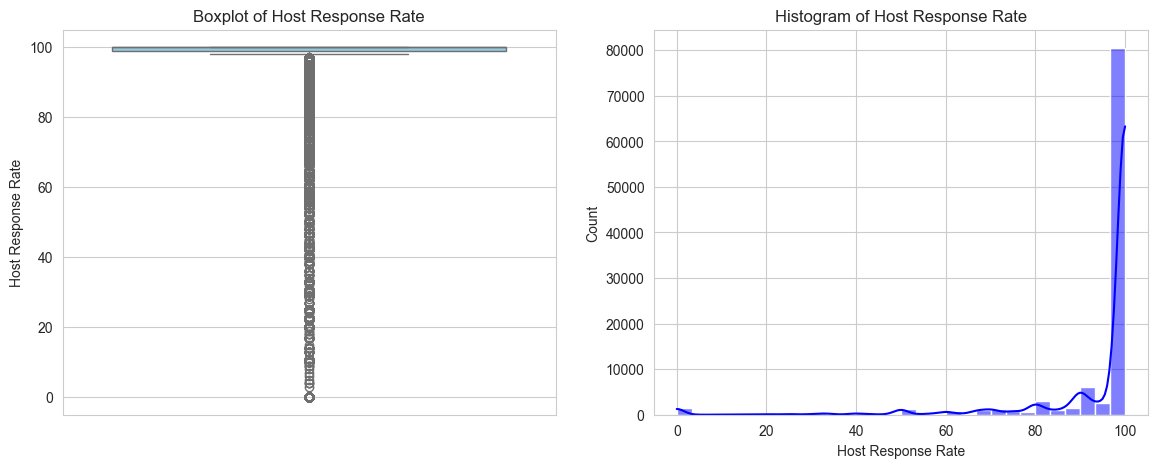

In [80]:
sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.boxplot(y=df['Host Response Rate'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Host Response Rate')


sns.histplot(df['Host Response Rate'], bins=30, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Histogram of Host Response Rate')


plt.show()

In [81]:
df['Host Response Rate'].fillna(df['Host Response Rate'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19856\4202744509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Host Response Rate'].fillna(df['Host Response Rate'].mean(), inplace=True)


In [82]:
df.isnull().sum() / len(df) * 100

Last Scraped                       0.000000
Experiences Offered                0.000000
Host ID                            0.000000
Host Since                         0.000000
Host Response Time                 0.000000
Host Response Rate                 0.000000
Host Neighbourhood                16.107742
Host Listings Count                0.212570
Host Total Listings Count          0.212570
Host Verifications                 0.256422
Street                             0.000000
Neighbourhood                     19.857444
Neighbourhood Cleansed             0.000000
City                               0.000000
State                              0.000000
Zipcode                            1.263527
Market                             0.763319
Smart Location                     0.000743
Latitude                           0.000000
Longitude                          0.000000
Property Type                      0.004460
Room Type                          0.000000
Accommodates                    

In [90]:
df.rename(columns={'Neighbourhood Cleansed': 'Neighbourhood'}, inplace=True)

In [94]:
df['Neighbourhood'].value_counts()

Neighbourhood
Williamsburg                                                                                         3719
Bedford-Stuyvesant                                                                                   2850
Harlem                                                                                               2524
East Village                                                                                         2133
Venice                                                                                               2085
78704                                                                                                2017
Hollywood                                                                                            1993
Bushwick                                                                                             1937
Upper West Side                                                                                      1782
Hell's Kitchen                  

In [83]:
df['Host Neighbourhood'].unique()

array(['Woodland Hills/Warner Center', 'Studio City', nan, ...,
       'Knightsbridge', 'Poblacion', 'Pudong'],
      shape=(1399,), dtype=object)

In [84]:
df['City'].unique()

array(['Los Angeles', 'Woodland Hills', 'Hollywood', 'Sikovina', 'Venice',
       'Venice Beach', 'Marina Del Rey', 'Walnut', 'Harbor City',
       'Torrance', 'Whittier', 'Claremont', 'Compton', 'Covina',
       'Inglewood', 'Rowland Heights', 'La Crescenta-Montrose',
       'Beverly Grove', 'Beverly Hills', 'Calabasas', 'Culver City',
       'Diamond Bar', 'Pasadena', 'Pomona', 'Hacienda Heights',
       'Hawthorne', 'Hermosa Beach', 'El Segundo', 'Manhattan',
       'Glendale', 'Glendora', 'Northridge', 'Gardena', 'Lakewood',
       'La Mirada', 'Lancaster', 'Mar Vista', 'Long Beach',
       'Agoura Hills', 'Westlake Village', 'Agua Dulce', 'Santa Clarita',
       'Alhambra', 'Longbeach', 'Lynwood', 'Malibu', 'Malibu Beach',
       'Arcadia', 'Pico Rivera', 'Rancho Palos Verdes', 'Redondo Beach',
       'Santa Monica', 'Pacific Palisades', 'Monrovia', 'Burbank',
       'Monterey Park', 'Palmdale', 'Norwalk', 'Topanga', 'Van Nuys',
       'Valencia', 'Newhall', 'San Gabriel', 'Sherma

In [85]:
df['City'].value_counts()

City
New York                   19635
Los Angeles                19555
Brooklyn                   16514
Austin                      9566
San Francisco               8689
Washington                  7739
San Diego                   6206
New Orleans                 5298
Chicago                     5195
Seattle                     3816
Portland                    3542
Boston                      3418
Nashville                   3213
Queens                      2694
Denver                      2498
Oakland                     1610
Long Beach                  1091
Hollywood                   1078
Santa Monica                 993
Bronx                        626
Pasadena                     589
Marina Del Rey               520
Beverly Hills                493
Santa Cruz                   451
Malibu                       435
Venice                       430
Rowland Heights              355
Glendale                     319
Redondo Beach                315
Burbank                      264
Culve

In [86]:
df['Host Neighbourhood'] = df.groupby('City')['Host Neighbourhood'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

## yang hasilnya unknown berarti outliers

In [87]:
df[df['Host Neighbourhood']== 'Unknown'].count()

Last Scraped                      339
Experiences Offered               339
Host ID                           339
Host Since                        339
Host Response Time                339
Host Response Rate                339
Host Neighbourhood                339
Host Listings Count               338
Host Total Listings Count         338
Host Verifications                338
Street                            339
Neighbourhood                       0
Neighbourhood Cleansed            339
City                              339
State                             339
Zipcode                           332
Market                            335
Smart Location                    339
Latitude                          339
Longitude                         339
Property Type                     339
Room Type                         339
Accommodates                      339
Bathrooms                         338
Bedrooms                          339
Beds                              339
Bed Type    

In [95]:
df['Host Neighbourhood'] = df['Host Neighbourhood'].replace("Unknown", np.nan)

In [96]:
df['Host Neighbourhood'].isna().sum()

np.int64(339)

In [97]:
df['Host Neighbourhood'] = df['Host Neighbourhood'].fillna(
    df.groupby('Neighbourhood')['Host Neighbourhood'].transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
)

In [98]:
df[df['Host Neighbourhood']== 'Unknown'].count()

Last Scraped                      98
Experiences Offered               98
Host ID                           98
Host Since                        98
Host Response Time                98
Host Response Rate                98
Host Neighbourhood                98
Host Listings Count               98
Host Total Listings Count         98
Host Verifications                98
Street                            98
Neighbourhood                     98
City                              98
State                             98
Zipcode                           96
Market                            98
Smart Location                    98
Latitude                          98
Longitude                         98
Property Type                     98
Room Type                         98
Accommodates                      98
Bathrooms                         97
Bedrooms                          98
Beds                              98
Bed Type                          98
Amenities                         94
P

In [100]:
df['Host Neighbourhood'] = df['Host Neighbourhood'].replace("Unknown", np.nan)

In [103]:
df['Host Neighbourhood'] = df.groupby('Neighbourhood')['Host Neighbourhood'].transform(
    lambda x: x.fillna(np.random.choice(x.dropna(), 1)[0]) if x.dropna().size > 0 else np.nan
)

In [104]:
df['Host Neighbourhood'].isna().sum()

np.int64(98)

In [106]:
from geopy.geocoders import Nominatim
import time
import numpy as np

geolocator = Nominatim(user_agent="airbnb_analysis")

def get_neighbourhood(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address = location.raw['address']
        return address.get('suburb') or address.get('Neighbourhood') or address.get('City') or np.nan
    except:
        return np.nan 

df.loc[df['Host Neighbourhood'].isna(), 'Host Neighbourhood'] = df.apply(
    lambda row: get_neighbourhood(row['Latitude'], row['Longitude']) if pd.isna(row['Host Neighbourhood']) else row['Host Neighbourhood'],
    axis=1
)


In [107]:
df['Host Neighbourhood'].isna().sum()

np.int64(88)

In [108]:
df['Host Neighbourhood'].value_counts()

Host Neighbourhood
Williamsburg                                                                                                                                                                                                                                                           4942
Mid-Wilshire                                                                                                                                                                                                                                                           4937
Harlem                                                                                                                                                                                                                                                                 4448
Central Business District                                                                                                                                                        

In [111]:
df['Host Neighbourhood'] = df['Host Neighbourhood'].replace([
    'Very young neighborhood yet a bit removed from the drunken craziness so you have the luxury of sleeping on a very quiet street but walking just a few blocks to the fun.',
    """10 min walk to Dogpatch, Mission, SOMA. Walking distance to Whole Foods, Anchor Steam Brewery, Plow, Farley's Coffee. \n\nNewly remodeled public library a 10 min walk away.\n\nPotrero Hill is known for its breathtaking downtown views, great, eclectic vibe, an"""
], np.nan)


In [112]:
df['Host Neighbourhood'].value_counts()

Host Neighbourhood
Williamsburg                                 4942
Mid-Wilshire                                 4937
Harlem                                       4448
Central Business District                    3603
East Downtown                                2666
Capitol Hill                                 2334
Bedford-Stuyvesant                           2317
Hollywood                                    2294
Mission District                             1719
Bushwick                                     1714
Venice                                       1710
Pacific Beach                                1584
Upper West Side                              1508
Hell's Kitchen                               1383
Upper East Side                              1286
Astoria                                      1258
West Hollywood                               1223
East Village                                 1203
Crown Heights                                1193
Downtown                       

In [113]:
df['Host Neighbourhood'] = df['Host Neighbourhood'].fillna(
    df.groupby('State')['Host Neighbourhood'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)

In [114]:
df['Host Neighbourhood'].isna().sum()

np.int64(0)

In [117]:
df.isnull().sum() / len(df) * 100

Last Scraped                       0.000000
Experiences Offered                0.000000
Host Since                         0.000000
Host Response Time                 0.000000
Host Response Rate                 0.000000
Host Neighbourhood                 0.000000
Host Listings Count                0.212570
Host Total Listings Count          0.212570
Host Verifications                 0.256422
Street                             0.000000
Neighbourhood                      0.000000
City                               0.000000
State                              0.000000
Zipcode                            1.263527
Market                             0.763319
Smart Location                     0.000743
Latitude                           0.000000
Longitude                          0.000000
Property Type                      0.004460
Room Type                          0.000000
Accommodates                       0.045338
Bathrooms                          0.318855
Bedrooms                        

In [118]:
df['Zipcode'].isnull().sum()

np.int64(1700)

In [119]:
df['Zipcode'].value_counts()

Zipcode
11211                2090
78704                1994
90291                1733
92109                1411
11206                1405
11221                1371
90046                1367
94110                1288
20002                1270
20009                1270
10002                1247
78702                1202
11216                1163
20001                1148
10009                1148
11238                1113
90028                1094
10003                1033
90026                 980
11222                 978
10019                 975
10025                 927
70119                 921
11237                 868
10011                 849
90036                 839
10027                 829
92101                 825
10031                 806
70130                 780
11215                 774
10036                 757
70116                 753
94117                 745
10014                 745
94109                 738
10012                 737
90068                 718
7011

In [124]:
import re

# Mapping manual untuk koreksi Zipcode yang typo atau tidak sesuai
zipcode_corrections = {
    "99\n98122": "98122",
    "11249\n11249": "11249",
    "70119\n70119": "70119",
    "94158\n94158": "94158",
    "9004": "90004",  
    "1m": np.nan,  
    "210": np.nan, 
    "701115": "70115",  
    "999041": "99041", 
    "02108 02111": "02108", 
    "Near 91304": "91304",  
    "90036-2514": "90036",  
    "90035-4475": "90035",
    "37216-2646": "37216",
    "94107-1273": "94107",
    "94610-2428": "94610",
    "10003-8623": "10003",
    "11103-3233": "11103",
    "10002-2289": "10002",
    "11385-2308": "11385",
    "11426-1175": "11426",
    "20007-3413": "20007",
    "90005-3747": "90005",
    "60660-1448": "60660",
    "90403-2638": "90403",
    "90034-2203": "90034",
    "70119 New Orleans": "70119",
    "91001-2243" : "91001",
    "91604-3646" : "91604",
    "1124911249" : "11249",
    "91606-1412" : "91606",
    "90039-2715" : "90039",
    "7011970119" : "70119",
    "9415894158" : "94158",
    "20001-4044" : "20001",
    "1" : np.nan,
    "02134-1704" : "02134",
    "0210802111" : "02108",
    "9998122" : "99981"
}


df['Zipcode'] = df['Zipcode'].astype(str).str.replace(r'[^0-9-]', '', regex=True).str.strip()


df['Zipcode'] = df['Zipcode'].replace(zipcode_corrections)



In [125]:
df['Zipcode'].value_counts()

Zipcode
11211    2090
78704    1994
90291    1733
         1702
92109    1411
11206    1405
11221    1371
90046    1367
94110    1288
20009    1270
20002    1270
10002    1248
78702    1202
11216    1163
20001    1149
10009    1148
11238    1113
90028    1094
10003    1034
90026     980
11222     978
10019     975
10025     927
70119     923
11237     868
10011     849
90036     840
10027     829
92101     825
10031     806
70130     780
11215     774
10036     757
70116     753
10014     745
94117     745
94109     738
10012     737
90068     718
70117     713
11249     705
10029     703
94114     702
90066     690
10016     655
11205     649
78703     642
78741     631
20003     622
70115     614
92037     607
11233     598
11225     593
11226     578
90027     571
37206     562
90038     552
90292     530
90025     526
11217     521
90069     518
94103     513
90019     512
90048     510
78705     509
78745     505
20010     487
10032     486
10023     480
97211     478
94107     47

In [126]:
df['Zipcode'] = df['Zipcode'].fillna(
    df.groupby('Host Neighbourhood')['Zipcode'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)


In [127]:
df['Zipcode'].isna().sum()

np.int64(0)

In [132]:
df['Host Verifications'].value_counts()

Host Verifications
email,phone,reviews,kba                                                                                                                  24302
email,phone,reviews,jumio                                                                                                                18390
email,phone,reviews                                                                                                                      18245
email,phone,facebook,reviews,kba                                                                                                         10418
email,phone,facebook,reviews,jumio                                                                                                        6414
email,phone                                                                                                                               6041
email,phone,facebook,reviews                                                                                               

In [136]:
df.groupby('State')['Host Verifications'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

State
CA               email,phone,reviews,kba
CO      email,phone,facebook,reviews,kba
DC               email,phone,reviews,kba
IL               email,phone,reviews,kba
LA               email,phone,reviews,kba
MA             email,phone,reviews,jumio
MD               email,phone,reviews,kba
MP    email,phone,facebook,reviews,jumio
NJ                   email,phone,reviews
NY               email,phone,reviews,kba
OR               email,phone,reviews,kba
TN               email,phone,reviews,kba
TX               email,phone,reviews,kba
VT                           email,phone
WA      email,phone,facebook,reviews,kba
Name: Host Verifications, dtype: object

In [137]:
df['Host Verifications'] = df.groupby('City')['Host Verifications'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)


In [138]:
df['Host Verifications'].isna().sum()

np.int64(0)

In [141]:
df.isnull().sum() / len(df) * 100

Last Scraped                       0.000000
Experiences Offered                0.000000
Host Since                         0.000000
Host Response Time                 0.000000
Host Response Rate                 0.000000
Host Neighbourhood                 0.000000
Host Total Listings Count          0.212570
Host Verifications                 0.000000
Street                             0.000000
Neighbourhood                      0.000000
City                               0.000000
State                              0.000000
Zipcode                            0.000000
Smart Location                     0.000743
Latitude                           0.000000
Longitude                          0.000000
Property Type                      0.004460
Room Type                          0.000000
Accommodates                       0.045338
Bathrooms                          0.318855
Bedrooms                           0.116690
Beds                               0.170205
Bed Type                        